In [16]:
import numpy as np
import matplotlib.pyplot as plt

### K-Means

In [17]:
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans 

# Generate synthetic data 
X, _ = make_blobs(random_state = 1) 
# Build clustering model 
kmeans = KMeans(n_clusters = 3) 
kmeans.fit(X)

KMeans(n_clusters=3)

In [18]:
print("Cluster memberships: {}".format(kmeans.labels_))
print("kmeans.labels_.shape:", kmeans.labels_.shape) 
print("X.shape", X.shape)
print("kmeans.cluster_centers_: ", kmeans.cluster_centers_)

Cluster memberships: [1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]
kmeans.labels_.shape: (100,)
X.shape (100, 2)
kmeans.cluster_centers_:  [[ -6.58196786  -8.17239339]
 [ -1.4710815    4.33721882]
 [-10.04935243  -3.85954095]]


In [19]:
nassig = kmeans.predict(X) 
print(nassig) 
print(nassig.shape) 
print(X.shape) #print(X)

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]
(100,)
(100, 2)


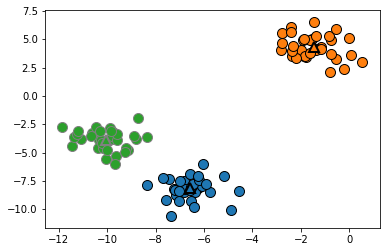

In [20]:
import mglearn

mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                         [0, 1, 2], markers='^', markeredgewidth=2)

### Agglomerative Clustering (AC)

In [21]:
# Aglomerative clustering: 
from sklearn.cluster import AgglomerativeClustering 

agg = AgglomerativeClustering(n_clusters = 3)
assignment = agg.fit_predict(X) 
print(assignment)

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


Text(0, 0.5, 'Feature 1')

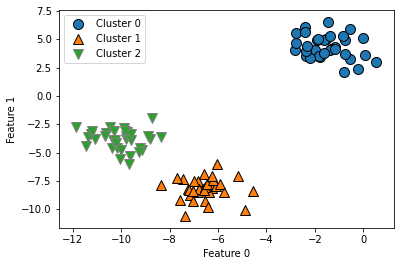

In [22]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment) 
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Dendrogram

Text(0, 0.5, 'Cluster distance')

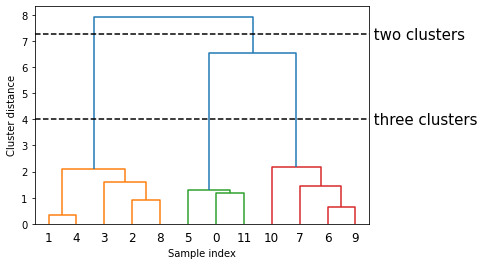

In [25]:
from scipy.cluster.hierarchy import dendrogram, ward 

X, y = make_blobs(random_state=0, n_samples=12) 

# Apply the ward clustering to the data array X 
# The SciPy ward function returns an array that specifies the distances 
# bridged when performing agglomerative clustering 
linkage_array = ward(X) 
# Now we plot the dendrogram for the linkage_array containing the distances 
# between clusters 
dendrogram(linkage_array) 

# mark the cuts in the tree that signify two or three clusters 
ax = plt.gca() 
bounds = ax.get_xbound() 
ax.plot(bounds, [7.25, 7.25], '--', c='k') 
ax.plot(bounds, [4, 4], '--', c='k') 
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15}) 
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15}) 
plt.xlabel("Sample index") 
plt.ylabel("Cluster distance")

### DBSCAN

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


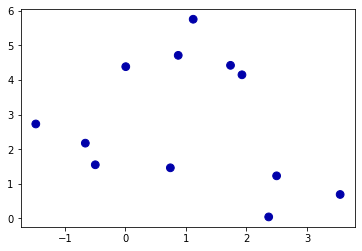

In [36]:
from sklearn.cluster import DBSCAN 

X, y = make_blobs(random_state = 0, n_samples = 12)
dbscan = DBSCAN(min_samples = 3, eps = 0.5) 
clusters = dbscan.fit_predict(X) 
print("Cluster memberships:\n{}".format(clusters))
plt.scatter(X[:, 0], X[:, 1], c = clusters, cmap = mglearn.cm2, s = 60)

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


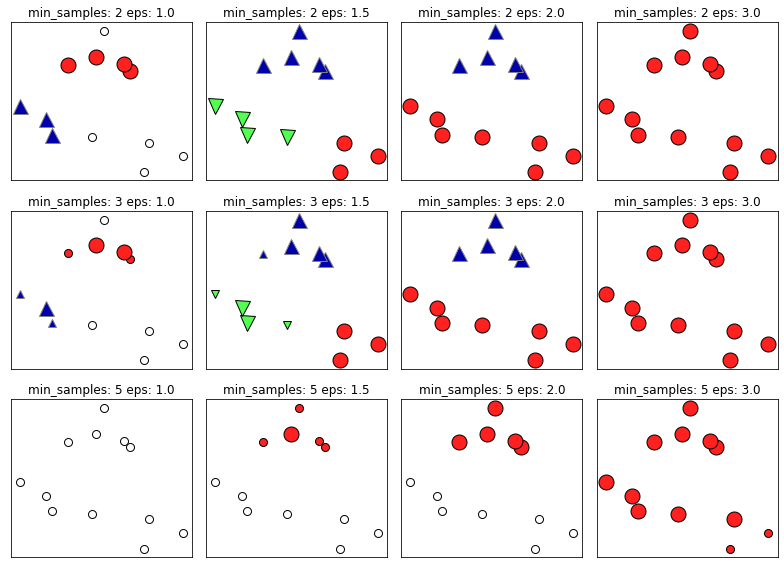

In [29]:
mglearn.plots.plot_dbscan()

Text(0, 0.5, 'Feature 1')

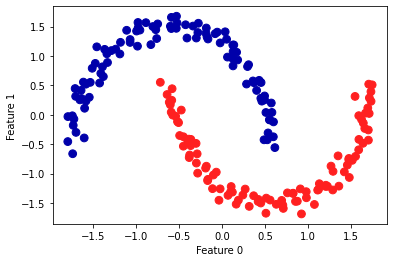

In [33]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples = 200, noise = 0.05, random_state=0) 

# Rescale the data to zero mean and unit variance 
scaler = StandardScaler() 
scaler.fit(X)
X_scaled = scaler.transform(X) 
dbscan = DBSCAN() 
clusters = dbscan.fit_predict(X_scaled) 

# plot the cluster assignments 
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60) 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1")